In [9]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Load dataset
data = pd.read_csv('Data/suicide_rates_1990-2022.csv')

In [18]:
print("Shape = ", data.shape)
print('\n')
print(data.head())
print('\n')
print("Columns = ", data.columns)

Shape =  (118560, 18)


  RegionCode RegionName CountryCode CountryName  Year   Sex     AgeGroup  \
0         EU     Europe         ALB     Albania  1992  Male   0-14 years   
1         EU     Europe         ALB     Albania  1992  Male   0-14 years   
2         EU     Europe         ALB     Albania  1992  Male   0-14 years   
3         EU     Europe         ALB     Albania  1992  Male   0-14 years   
4         EU     Europe         ALB     Albania  1992  Male  15-24 years   

         Generation  SuicideCount  CauseSpecificDeathPercentage  \
0  Generation Alpha           0.0                      0.000000   
1  Generation Alpha           0.0                      0.000000   
2  Generation Alpha           0.0                      0.000000   
3  Generation Alpha           0.0                      0.000000   
4      Generation Z           5.0                      3.401361   

   DeathRatePer100K  Population          GDP  GDPPerCapita  \
0          0.000000   3247039.0  652174990.8     200.8

In [22]:
# Descriptive statistics
data.describe()

,Year,SuicideCount,CauseSpecificDeathPercentage,DeathRatePer100K,Population,GDP,GDPPerCapita,GrossNationalIncome,GNIPerCapita,InflationRate,EmploymentPopulationRatio
count,118560.000000,118096.000000,114271.000000,107896.000000,1.126400e+05,1.113200e+05,111320.000000,1.086000e+05,107800.000000,104100.000000,107440.000000
mean,2005.740047,63.632037,3.873690,12.299791,2.456184e+07,4.883351e+11,17423.508254,4.976795e+11,22147.217069,20.286455,55.750811
std,8.745003,254.095408,7.317820,21.016170,4.531156e+07,1.653252e+12,19332.136111,1.689591e+12,18886.398425,163.099904,8.140994
min,1990.000000,0.000000,0.000000,0.000000,4.054200e+04,2.197630e+08,60.235121,2.082832e+08,780.000000,-10.630097,32.026000
25%,1999.000000,0.000000,0.000000,0.000000,2.613805e+06,1.162585e+10,3941.598643,1.176795e+10,8670.000000,1.498961,50.791000
50%,2006.000000,4.000000,0.586166,4.452366,6.888434e+06,6.268216e+10,9708.141348,5.987715e+10,16150.000000,3.038888,56.021000
75%,2013.000000,32.000000,4.355646,15.384615,2.533364e+07,3.013550e+11,25197.265600,3.057210e+11,29530.000000,6.536199,60.415250
max,2022.000000,6787.000000,100.000000,502.512563,3.320316e+08,2.331510e+13,133711.794400,2.370530e+13,152630.000000,4734.914347,87.518000


In [30]:
# Number of Suicides by resion
data.groupby(['RegionName']).sum(numeric_only=True)['SuicideCount']

RegionName
Africa                               15592.0
Asia                               1665543.0
Central and South America           748702.0
Europe                             3624527.0
North America and the Caribbean    1363995.0
Oceania                              96330.0
Name: SuicideCount, dtype: float64

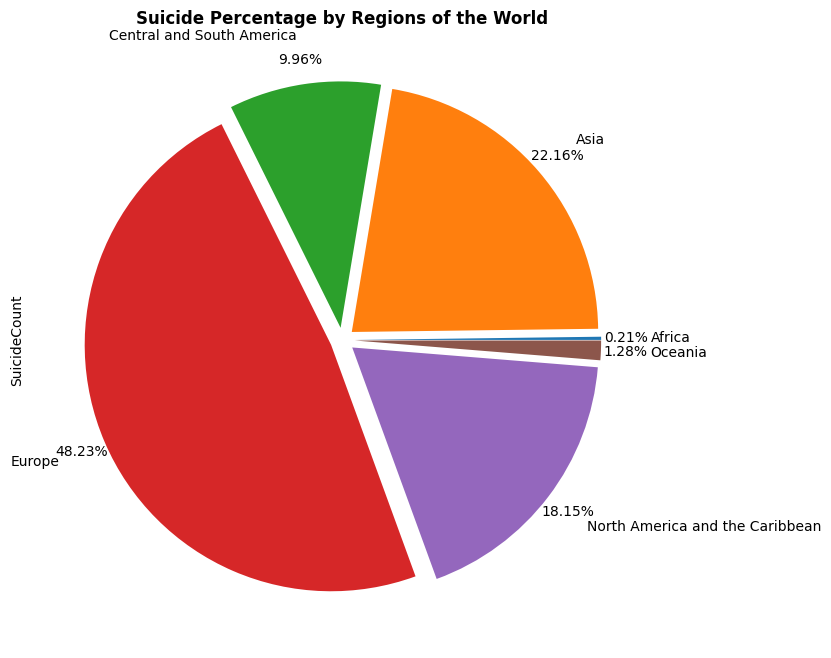

In [17]:
# Plot Suicide Percentage by Region
explode = np.full(len(data['RegionName'].unique()), 0.05)
data.groupby(['RegionName']).sum(numeric_only=True).plot.pie(
    y='SuicideCount', 
    figsize=(15,8), 
    autopct='%.2f%%', 
    explode=explode,
    pctdistance=1.1, 
    labeldistance=1.2
    )
plt.title("Suicide Percentage by Regions of the World", fontweight="bold")
plt.legend().remove()
plt.show()

In [41]:
# Number of Suicides by country
data.groupby(['CountryName']).sum(numeric_only=True)['SuicideCount']

CountryName
Albania                                                    1809.0
Antigua and Barbuda                                          13.0
Argentina                                                 90169.0
Armenia                                                    2198.0
Australia                                                 82204.0
                                                          ...    
United Kingdom of Great Britain and Northern Ireland     138786.0
United States of America                                1164733.0
Uruguay                                                   15400.0
Uzbekistan                                                46708.0
Venezuela (Bolivarian Republic of)                        23958.0
Name: SuicideCount, Length: 117, dtype: float64

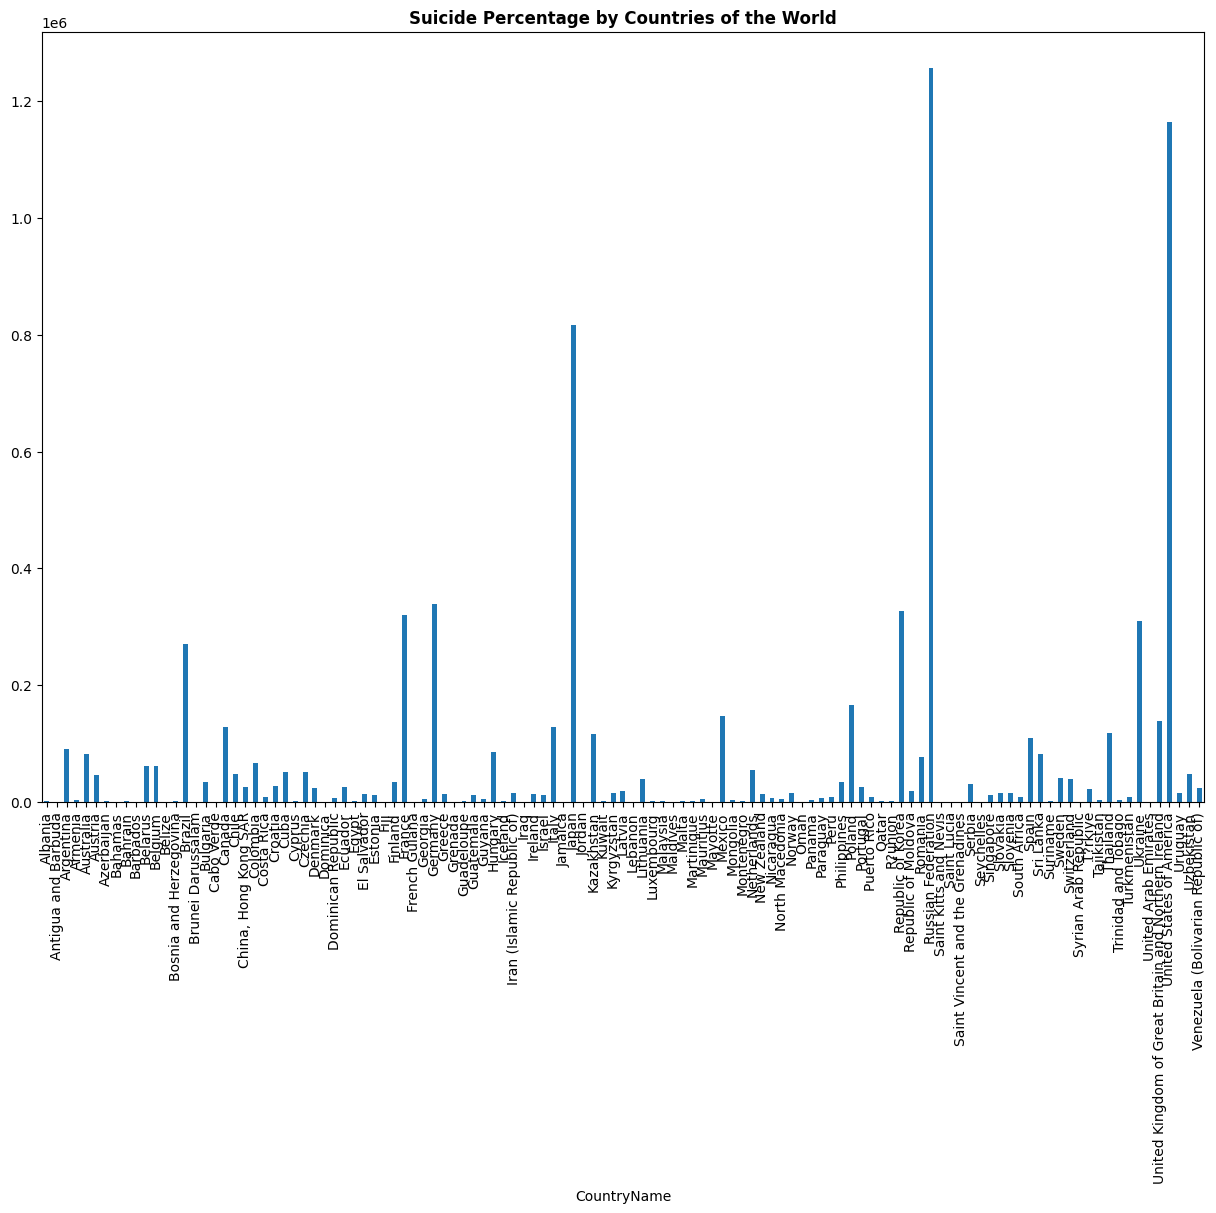

In [48]:
# Plot Suicide Percentage by country
data.groupby(['CountryName'])['SuicideCount'].sum(numeric_only=True).plot(
    kind='bar',
    figsize=(15,10)
    )
plt.title("Suicide Percentage by Countries of the World", fontweight="bold")
plt.legend().remove()
plt.show()